## Filter out movies with too few ratings

In [1]:
import pandas as pd
import glob
%matplotlib inline

### Concat to 1 df

In [77]:
df_rating = []
for file in glob.glob("crawl-ratings/*.csv"):
    df_rating.append(pd.read_csv(file))

In [78]:
df_rating = pd.concat(df_rating)

In [79]:
df_rating

,UserID,MovieID,Rating
0,ur31518873,tt1298650,6
1,ur31518873,tt0099685,7
2,ur31518873,tt0268978,8
3,ur31518873,tt0097576,7
4,ur31518873,tt0368891,6
...,...,...,...
925141,ur2467618,tt0113492,6
925142,ur2467618,tt0073631,10
925143,ur2467618,tt0199683,6
925144,ur2467618,tt0170016,1


In [95]:
movie_stat = df_rating['MovieID'].value_counts()

### Some stats

In [56]:
print(movie_stat.sum())
print(movie_stat[movie_stat>=5].sum())
print(movie_stat[movie_stat<5].sum())

1626980
1464738
162242


In [101]:
print(movie_stat.sum())
print(movie_stat[movie_stat>=50].sum())
print(movie_stat[movie_stat<10].sum())

1626980
1022534
265728


In [102]:
print(movie_stat.value_counts()[4:9].sum())
print(movie_stat.value_counts()[9:].sum())
print(movie_stat.value_counts()[50:].sum())
print(movie_stat.value_counts().sum())

15844
22874
6369
137775


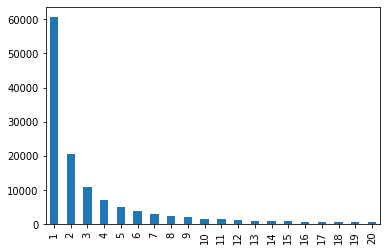

In [44]:
movie_stat.value_counts()[:20].plot.bar()

### Filter with threshold

In [84]:
threshold=5

In [92]:
df_rating_filtered = df_rating[df_rating.MovieID.isin(movie_stat[movie_stat>=threshold].index)]

In [96]:
df_rating_filtered['MovieID'].value_counts()

tt0096697    5929
tt0944947    3676
tt0108778    3239
tt0052520    2891
tt0903747    2409
             ... 
tt1078933       5
tt0362942       5
tt0065105       5
tt0023677       5
tt0112619       5
Name: MovieID, Length: 38718, dtype: int64

In [114]:
df_rating_filtered['UserID'].value_counts()[-15:]

ur103317327    103
ur61423863     102
ur32915980     101
ur49236468     101
ur5411269      100
ur82903451      99
ur22999317      99
ur62942093      99
ur106224983     94
ur40049808      93
ur46768703      91
ur108071848     86
ur94875269      85
ur14330747      61
ur92127176      59
Name: UserID, dtype: int64

In [98]:
df_rating_filtered.to_csv('crawl-ratings/rating-filtered.csv')

In [108]:
# Other threshold
threshold=30

In [109]:
df_rating_filtered_50 = df_rating[df_rating.MovieID.isin(movie_stat[movie_stat>=threshold].index)]

In [110]:
df_rating_filtered_50['MovieID'].value_counts()

tt0096697    5929
tt0944947    3676
tt0108778    3239
tt0052520    2891
tt0903747    2409
             ... 
tt5316540      30
tt0062861      30
tt2203308      30
tt0037615      30
tt5278426      30
Name: MovieID, Length: 9748, dtype: int64

In [111]:
df_rating_filtered_50['UserID'].value_counts()

ur19009969    15934
ur3032357     15158
ur34575093     9429
ur23172671     9350
ur28967391     9329
              ...  
ur13588546       49
ur11983563       46
ur92127176       40
ur53825238       30
ur14330747       25
Name: UserID, Length: 1105, dtype: int64

## Split train-test

In [2]:
df = pd.read_csv('crawl-ratings/rating-filtered.csv')

In [6]:
user_list = df.UserID.unique()

In [10]:
train_list=[]
test_list=[]
test_rating_per_user=20
for user in user_list:
    user_rating = df[df.UserID == user]
    user_test = user_rating.sample(n=test_rating_per_user,random_state=0)
    test_list.append(user_test)
    train_list.append(user_rating.drop(user_test.index))
    print('.',end='')
train_df = pd.concat(train_list)
test_df = pd.concat(test_list)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [16]:
test_df.UserID.value_counts()

ur35000509    20
ur6918917     20
ur82535306    20
ur50335266    20
ur10115534    20
              ..
ur66601046    20
ur94875269    20
ur0568099     20
ur19998007    20
ur61466300    20
Name: UserID, Length: 1105, dtype: int64

In [17]:
train_df.to_csv('crawl-ratings/train.csv',index=None)

In [19]:
test_df.to_csv('crawl-ratings/test.csv',index=None)